In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Set seed untuk reproduktibilitas
np.random.seed(42)
random.seed(42)

def generate_shopping_dataset(num_samples=500):
    data = []

    for i in range(num_samples):
        # Generate Customer ID
        customer_id = f"C{random.randint(100000, 999999)}"

        # Generate Gender
        gender = random.choice(['Male', 'Female'])

        # Generate Shopping Frequency (distribusi Poisson)
        shopping_freq = np.random.poisson(lam=5)
        shopping_freq = max(1, min(shopping_freq, 15))

        # Generate Average Cart Value (distribusi log-normal)
        avg_cart = int(np.random.lognormal(mean=4.5, sigma=0.5))
        avg_cart = max(10, min(avg_cart, 500))

        # Generate Website Time (distribusi normal)
        website_time = int(np.random.normal(45, 20))
        website_time = max(5, min(website_time, 120))

        # Generate Email Opens (distribusi binomial)
        email_opens = np.random.binomial(n=15, p=0.3)
        email_opens = max(0, min(email_opens, 15))

        # Generate Purchased (berdasarkan perilaku)
        # Logit = b0 + b1*shopping_freq + b2*avg_cart + b3*website_time + b4*email_opens
        logit = -4 + 0.3*shopping_freq + 0.01*avg_cart + 0.02*website_time + 0.2*email_opens
        purchase_prob = 1 / (1 + np.exp(-logit))
        purchased = 1 if random.random() < purchase_prob else 0

        data.append([customer_id, gender, shopping_freq, avg_cart, website_time, email_opens, purchased])

    return pd.DataFrame(data, columns=['CustomerID', 'Gender', 'ShoppingFrequency', 'AvgCartValue',
                                       'WebsiteTime', 'EmailOpens', 'Purchased'])

# Generate dataset baru dengan 500 baris
shopping_dataset = generate_shopping_dataset(500)

# Simpan ke file CSV
shopping_dataset.to_csv('Customer_Shopping_Behavior.csv', index=False)

# Tampilkan preview
print("Preview Dataset Perilaku Belanja:")
print(shopping_dataset.head(10))
print(f"\nTotal Data: {len(shopping_dataset)}")
print("\nStatistik Deskriptif:")
print(shopping_dataset.describe())
print("\nDistribusi Purchased:")
print(shopping_dataset['Purchased'].value_counts(normalize=True))

Preview Dataset Perilaku Belanja:
  CustomerID  Gender  ShoppingFrequency  AvgCartValue  WebsiteTime  \
0    C770487    Male                  5           198           60   
1    C388389    Male                  4           101            6   
2    C872246    Male                  4           187           40   
3    C671858    Male                  4            66           39   
4    C133326    Male                  3            80           52   
5    C343962    Male                  8            54           13   
6    C850800  Female                  4           120           62   
7    C717889  Female                  3           106           64   
8    C106814    Male                  2           135           72   
9    C456778  Female                  6            24           61   

   EmailOpens  Purchased  
0           1          1  
1           4          1  
2           3          0  
3           5          0  
4           5          1  
5           3          0  
6     

In [2]:
dataset = pd.read_csv("Customer_Shopping_Behavior.csv")
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [3]:
# Split Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.25,   # 25% data untuk testing
    random_state=0     # Seed untuk reproduktibilitas
)

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)  # Fit dan transform data training
x_test = sc.transform(x_test)        # Transform data testing (HANYA transform)

In [5]:
# Membuat Model Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()            # Inisialisasi classifier
classifier.fit(x_train, y_train)     # Training model

GaussianNB()

In [6]:
# Prediksi
y_pred = classifier.predict(x_test)   # Memprediksi data testing

In [7]:
# Evaluasi Model
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print(f"\nAccuracy: {accuracy*100:.2f}%")

Confusion Matrix:
[[36 18]
 [26 45]]

Accuracy: 64.80%


<ipython-input-8-2a9110b5fdd7>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


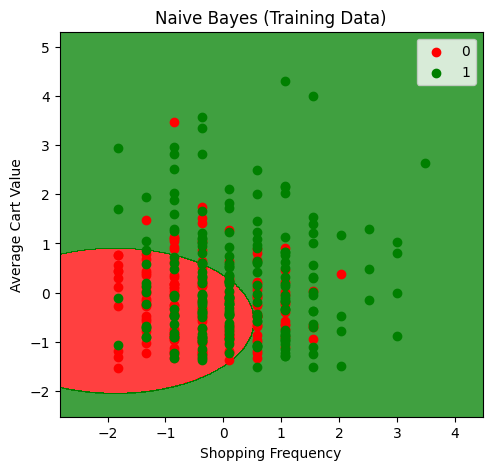

In [8]:
#  Visualisasi Data Training
from matplotlib.colors import ListedColormap
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Subplot kiri untuk training
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Naive Bayes (Training Data)')
plt.xlabel('Shopping Frequency')
plt.ylabel('Average Cart Value')
plt.legend()

<ipython-input-9-d7446857192b>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


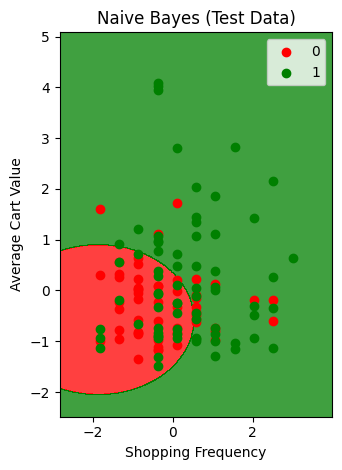

In [9]:
#  Visualisasi Data Testing
plt.subplot(1, 2, 2)  # Subplot kanan untuk testing
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Naive Bayes (Test Data)')
plt.xlabel('Shopping Frequency')
plt.ylabel('Average Cart Value')
plt.legend()

plt.tight_layout()
plt.show()